# Analyse de la matrice bouléenne d'expression de gène selon les conditions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importation de la matrice et séparation entre exprimé negativement et positivement

In [2]:
complete_data = pd.read_csv("data/expression_final.csv", index_col=0)
print(complete_data)

            1101  1104   29   30  1977  1973  1980  1976  1978  1974  ...  \
Unnamed: 0                                                            ...   
AT1G01010    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT1G01030    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT1G01040    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT1G01050    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT1G01060    0.0   0.0  1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...          ...   ...  ...  ...   ...   ...   ...   ...   ...   ...  ...   
AT5G67550    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT5G67560    0.0   0.0  0.0 -1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT5G67590    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   
AT5G67620    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT5G67630    0.0   0.0  0.0  1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

In [3]:
Info_allswap = pd.read_table("data/Info-allswap.txt")
Info_allswap["uniq_name"] = Info_allswap[['StressName', 'swap_name']].agg('__'.join, axis=1)

replace_col = {str(k): Info_allswap[Info_allswap["swap_id"] == k]["uniq_name"].values.tolist()[0] for k in Info_allswap["swap_id"]}

complete_data = complete_data.rename(replace_col, axis=1)

In [4]:
plus_data = np.where(complete_data == 1, True, False)
plus_data = pd.DataFrame(plus_data, index=complete_data.index, columns=complete_data.columns)
print(plus_data)

            DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1  \
Unnamed: 0                                                       
AT1G01010                                               False    
AT1G01030                                               False    
AT1G01040                                               False    
AT1G01050                                               False    
AT1G01060                                               False    
...                                                       ...    
AT5G67550                                               False    
AT5G67560                                               False    
AT5G67590                                               False    
AT5G67620                                               False    
AT5G67630                                               False    

            DROUGHT__Total_RNA_Drought_2 / Total_RNA_Control_2  \
Unnamed: 0                                                       
AT1G01010

In [5]:
minus_data = np.where(complete_data == -1, True, False)
minus_data = pd.DataFrame(minus_data, index=complete_data.index, columns=complete_data.columns)
print(minus_data)

            DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1  \
Unnamed: 0                                                       
AT1G01010                                               False    
AT1G01030                                               False    
AT1G01040                                               False    
AT1G01050                                               False    
AT1G01060                                               False    
...                                                       ...    
AT5G67550                                               False    
AT5G67560                                               False    
AT5G67590                                               False    
AT5G67620                                               False    
AT5G67630                                               False    

            DROUGHT__Total_RNA_Drought_2 / Total_RNA_Control_2  \
Unnamed: 0                                                       
AT1G01010

### Exploration des motifs


In [54]:
from mlxtend.frequent_patterns import fpgrowth

### Avant Implémentation 

c:\Users\seiko\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\seiko\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\seiko\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


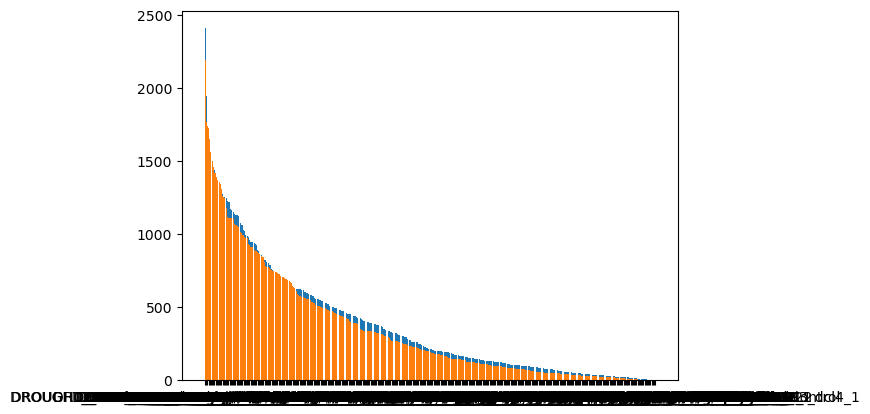

In [55]:
plt.figure()
plt.bar(plus_data.columns, plus_data.sum(0).sort_values(ascending = False) )
plt.bar(minus_data.columns, minus_data.sum(0).sort_values(ascending = False) )
plt.show()

### Implémentation du FP-Growth 

#### Motif de condition

In [56]:
PLM_final = pd.read_csv("data/PLM_final.csv", index_col=0)

PLM_final = pd.DataFrame(np.where(PLM_final == 1, True, False), index=PLM_final.index, columns=PLM_final.columns)

PLM_final

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,SAGATCYRR_295,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444
AT1G01010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01030,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01040,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01050,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01060,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67550,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
AT5G67560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
AT5G67590,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,True,False
AT5G67620,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True


In [57]:
MLP_gene = {}

for cond in plus_data.columns:
    MLP_gene[cond] = []
    for gen in plus_data.index:
        if plus_data[cond][gen]:
            MLP_gene[cond].append(PLM_final.columns[PLM_final.loc[gen]].to_list() )
        else:
            continue

In [58]:
from itertools import chain

def flatten_chain(matrix):
    return list(chain.from_iterable(matrix))

for cond in MLP_gene:
    MLP_gene[cond] = {i:flatten_chain(MLP_gene[cond]).count(i) for i in flatten_chain(MLP_gene[cond])}

In [59]:
motif_plus_cond = fpgrowth(plus_data, min_support=0.1, use_colnames=True)
motif_plus_cond["nb_gene"] = motif_plus_cond["support"] * plus_data.shape[0]

col = []
for itmset in motif_plus_cond["itemsets"]:
    itmset = list(itmset)
    col_col = []
    for itm in itmset:
        col_col.append(MLP_gene[itm])
    col.append(col_col)

motif_plus_cond["PLM"] = col

motif_plus_cond.sort_values(by = 'support', ascending = False).head(5)

,support,itemsets,nb_gene,PLM
9,0.223698,(NECROTROPHIC.BACTERIA__B06_24h_water / B11_24...,2409.0,"[{'GRWAAW_-212': 1748, 'AATAAA_-169': 1355, 'T..."
10,0.180704,(NECROTROPHIC.BACTERIA__B04_06h_water / B09_06...,1946.0,"[{'GRWAAW_-212': 1411, 'AATAAA_-169': 1094, 'T..."
5,0.152010,(NITROGEN__Leaf_10d_24h_2 / Leaf_10d_2),1637.0,"[{'GRWAAW_-212': 1169, 'AATAAA_-169': 922, 'TT..."
11,0.150060,(NITROGEN__Root_Col0_100uM_1 / Root_Col0_10mM_1),1616.0,"[{'GRWAAW_-212': 1164, 'AATAAA_-169': 926, 'TT..."
12,0.145510,(NECROTROPHIC.BACTERIA__Ea_dspAE_24h_1 / Ea_24...,1567.0,"[{'GRWAAW_-212': 1149, 'AATAAA_-169': 887, 'TT..."


In [4]:
"aa__uu"

'aa'

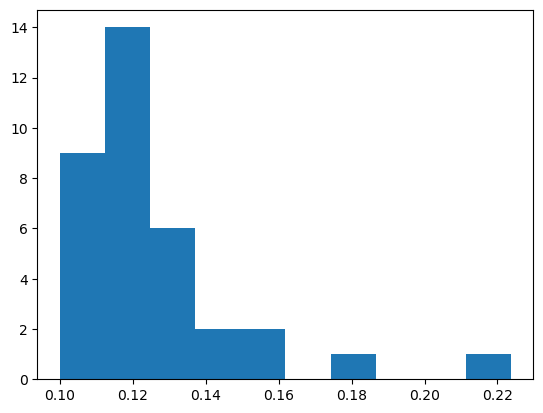

In [60]:
plt.figure()
plt.hist(motif_plus_cond["support"])
plt.show()

In [61]:
motif_minus_cond = fpgrowth(minus_data, min_support=0.1, use_colnames=True)
motif_minus_cond["nb_gene"] = motif_minus_cond["support"] * minus_data.shape[0]

col = []
for itmset in motif_minus_cond["itemsets"]:
    itmset = list(itmset)
    col_col = []
    for itm in itmset:
        col_col.append(MLP_gene[itm])
    col.append(col_col)

motif_minus_cond["PLM"] = col

motif_minus_cond.sort_values(by = 'support', ascending = False).head(5)

,support,itemsets,nb_gene,PLM
22,0.203733,(NECROTROPHIC.BACTERIA__B06_24h_water / B11_24...,2194.0,"[{'GRWAAW_-212': 1748, 'AATAAA_-169': 1355, 'T..."
3,0.163804,(NITROGEN__Leaf_10d_24h_2 / Leaf_10d_2),1764.0,"[{'GRWAAW_-212': 1169, 'AATAAA_-169': 922, 'TT..."
0,0.161296,(NECROTROPHIC.BACTERIA__B04_06h_water / B09_06...,1737.0,"[{'GRWAAW_-212': 1411, 'AATAAA_-169': 1094, 'T..."
5,0.160089,(FUNGI__Bc_Control_pBIN_48h / Control_pBIN_T0),1724.0,"[{'GRWAAW_-212': 1138, 'AAAGYV_-116': 944, 'WS..."
17,0.153218,(NITROGEN__Leaf_10d_24h_1 / Leaf_10d_1),1650.0,"[{'GRWAAW_-212': 1031, 'AATAAA_-169': 810, 'TT..."


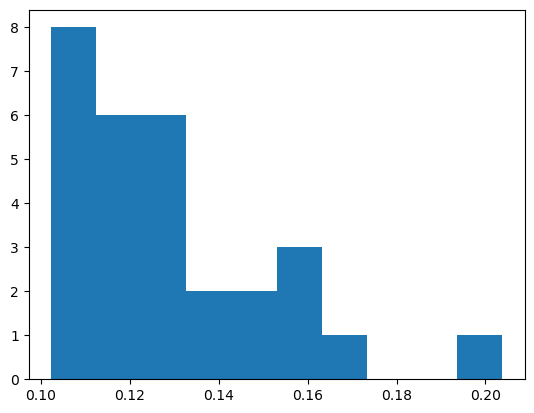

In [62]:
plt.figure()
plt.hist(motif_minus_cond["support"])
plt.show()

In [63]:
print("Condition avec expression positif dans ceux avec expression négative : " ,
      motif_plus_cond["itemsets"].isin(motif_minus_cond["itemsets"]).sum()/len(motif_plus_cond["itemsets"]))
print("Condition avec expression négatif dans ceux avec expression positive : " ,
      motif_minus_cond["itemsets"].isin(motif_plus_cond["itemsets"]).sum()/len(motif_minus_cond["itemsets"]))

Condition avec expression positif dans ceux avec expression négative :  0.6857142857142857
Condition avec expression négatif dans ceux avec expression positive :  0.8275862068965517


#### Motif de gene

In [64]:
motif_plus_gene = fpgrowth(plus_data.T, min_support=0.1, use_colnames=True)
motif_plus_gene["nb_gene"] = motif_plus_gene["support"] * plus_data.T.shape[0]

col = []
for itmset in motif_plus_gene["itemsets"]:
    itmset = list(itmset)
    col_col = []
    for itm in itmset:
        plm = PLM_final.columns[PLM_final.loc[gen]].to_list()
        col_col.append({i:plm.count(i) for i in plm})
    col.append(col_col)

motif_plus_gene["PLM"] = col

motif_plus_gene.sort_values(by = 'support', ascending = False).head(5)

,support,itemsets,nb_gene,PLM
210,0.299742,(AT3G50930),116.0,"[{'AATAAT_-102': 1, 'VCGCGB_-80': 1, 'CCTTTT_-..."
211,0.284238,(AT5G20230),110.0,"[{'AATAAT_-102': 1, 'VCGCGB_-80': 1, 'CCTTTT_-..."
0,0.281654,(AT4G02380),109.0,"[{'AATAAT_-102': 1, 'VCGCGB_-80': 1, 'CCTTTT_-..."
212,0.276486,(AT1G32920),107.0,"[{'AATAAT_-102': 1, 'VCGCGB_-80': 1, 'CCTTTT_-..."
214,0.273902,(AT1G07135),106.0,"[{'AATAAT_-102': 1, 'VCGCGB_-80': 1, 'CCTTTT_-..."


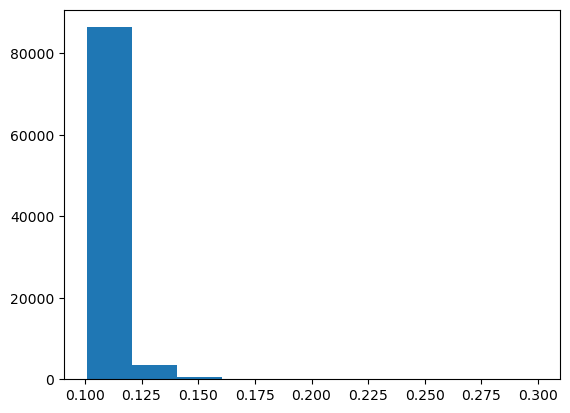

In [65]:
plt.figure()
plt.hist(motif_plus_gene["support"])
plt.show()

In [66]:
motif_minus_gene = fpgrowth(minus_data.T, min_support=0.1, use_colnames=True)
motif_minus_gene["nb_gene"] = motif_minus_gene["support"] * minus_data.T.shape[0]

col = []
for itmset in motif_minus_gene["itemsets"]:
    itmset = list(itmset)
    col_col = []
    for itm in itmset:
        plm = PLM_final.columns[PLM_final.loc[gen]].to_list()
        col_col.append({i:plm.count(i) for i in plm})
    col.append(col_col)

motif_minus_gene["PLM"] = col

motif_minus_gene.sort_values(by = 'support', ascending = False).head(5)

,support,itemsets,nb_gene,PLM
43,0.294574,(AT2G45180),114.0,"[{'AATAAT_-102': 1, 'VCGCGB_-80': 1, 'CCTTTT_-..."
44,0.255814,(AT3G16240),99.0,"[{'AATAAT_-102': 1, 'VCGCGB_-80': 1, 'CCTTTT_-..."
304,0.250646,(AT4G13770),97.0,"[{'AATAAT_-102': 1, 'VCGCGB_-80': 1, 'CCTTTT_-..."
45,0.232558,(AT5G44020),90.0,"[{'AATAAT_-102': 1, 'VCGCGB_-80': 1, 'CCTTTT_-..."
25,0.227390,(AT1G03870),88.0,"[{'AATAAT_-102': 1, 'VCGCGB_-80': 1, 'CCTTTT_-..."


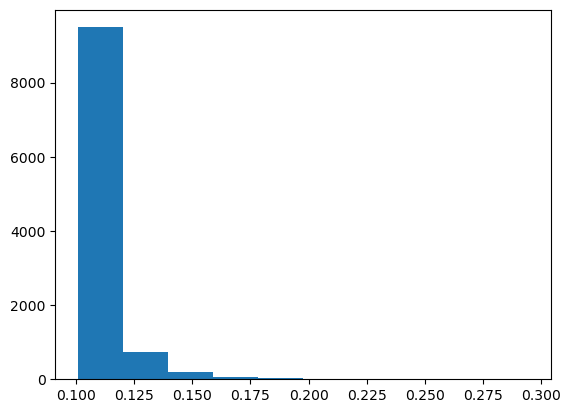

In [67]:
plt.figure()
plt.hist(motif_minus_gene["support"])
plt.show()

In [68]:
#motif_plus_cond.to_csv(r'Me/motif_plus_cond.csv', index=True)
#motif_minus_cond.to_csv(r'Me/motif_minus_cond.csv', index=True)
#motif_plus_gene.to_csv(r'Me/motif_plus_gene.csv', index=True)
#motif_minus_gene.to_csv(r'Me/motif_minus_gene.csv', index=True)

### Extraction des motifs 

motif_minus_cond

In [69]:
motif_plus_cond_data = {k: [] for k in PLM_final.columns.tolist()}
motif_minus_cond_data = {k: [] for k in PLM_final.columns.tolist()}

for row in range(0,len(motif_plus_cond)):
    plm_x = motif_plus_cond["PLM"][row][0]
    for plm in motif_plus_cond_data:
        if plm in plm_x:
            motif_plus_cond_data[plm].append(motif_plus_cond["PLM"][row][0][plm])
        else :
            motif_plus_cond_data[plm].append(0)
            
for row in range(0,len(motif_minus_cond)):
    plm_x = motif_minus_cond["PLM"][row][0]
    for plm in motif_minus_cond_data:
        if plm in plm_x:
            motif_minus_cond_data[plm].append(motif_minus_cond["PLM"][row][0][plm])
        else :
            motif_minus_cond_data[plm].append(0)

motif_plus_cond_data = pd.DataFrame(motif_plus_cond_data)
motif_minus_cond_data = pd.DataFrame(motif_minus_cond_data)

In [91]:
cond_plus = []
for i in motif_plus_cond["itemsets"]:
    cond_plus.append("///".join(list(i)))

cond_minus = []
for i in motif_minus_cond["itemsets"]:
    cond_minus.append("///".join(list(i)))

motif_plus_cond_data["_condition"] = cond_plus
motif_minus_cond_data["_condition"] = cond_minus

In [92]:
#motif_plus_cond_data.to_csv(r'Me/motif_plus_cond_data.csv', index=True)
#motif_minus_cond_data.to_csv(r'Me/motif_minus_cond_data.csv', index=True)

In [93]:
#motif_plus_cond_data = pd.read_csv("Me/motif_plus_cond_data.csv", index_col=0)
#motif_minus_cond_data = pd.read_csv("Me/motif_minus_cond_data.csv", index_col=0)

In [94]:
motif_plus_cond_data

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444,_condition
0,3,0,2,11,47,1,64,78,8,912,...,4,1,19,192,2,97,125,503,302,NEMATODES__21_I_2 / 21_NI_2
1,1,1,4,15,44,3,71,68,7,912,...,0,7,15,154,4,65,93,456,242,FUNGI__Bc_Control_pBIN_18h / Control_pBIN_T0
2,1,0,3,9,40,1,76,67,6,923,...,2,6,19,194,2,98,100,475,251,FUNGI__Bc_Control_pBIN_4h / Control_pBIN_T0
3,0,0,4,12,37,2,66,68,14,899,...,0,6,16,171,5,63,110,473,231,TEMPERATURE__mekk1_1 / Col0_1
4,0,1,3,13,44,1,73,56,7,844,...,0,4,19,187,6,73,109,438,237,OXYDATIVE.STRESS__Saccharose_Atrazine / Mannitol
5,0,0,1,12,57,2,88,90,10,1169,...,2,5,17,170,5,55,143,587,293,NITROGEN__Leaf_10d_24h_2 / Leaf_10d_2
6,0,0,1,11,42,1,75,78,9,1031,...,2,3,14,153,5,55,135,526,248,NITROGEN__Leaf_10d_24h_1 / Leaf_10d_1
7,0,0,3,16,55,1,75,65,8,960,...,1,5,16,165,4,79,119,507,268,UV__DML6_UV_2 / DML6_2
8,0,0,2,18,46,2,69,70,11,932,...,1,4,18,184,5,78,109,488,248,UV__EBL87_UV_1 / EBL87_1
9,2,1,9,19,87,1,96,136,12,1748,...,3,7,44,272,8,130,227,1004,544,NECROTROPHIC.BACTERIA__B06_24h_water / B11_24h_Ea


In [95]:
motif_minus_cond_data

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444,_condition
0,2,1,4,13,59,1,79,107,14,1411,...,1,4,34,182,6,69,186,779,455,NECROTROPHIC.BACTERIA__B04_06h_water / B09_06h_Ea
1,0,0,0,9,21,1,36,35,3,550,...,0,5,10,78,3,22,68,292,135,HEAVY.METAL__Cadmium_30uM_L-NAME / Col0
2,0,0,0,4,12,0,20,24,1,323,...,0,3,8,47,1,15,41,187,101,HEAVY.METAL__L-NAME / Col0
3,0,0,1,12,57,2,88,90,10,1169,...,2,5,17,170,5,55,143,587,293,NITROGEN__Leaf_10d_24h_2 / Leaf_10d_2
4,0,2,9,14,53,2,79,84,10,1164,...,4,5,34,304,2,149,145,632,362,NITROGEN__Root_Col0_100uM_1 / Root_Col0_10mM_1
5,1,0,5,17,58,4,76,84,8,1138,...,2,4,27,223,4,93,131,573,304,FUNGI__Bc_Control_pBIN_48h / Control_pBIN_T0
6,0,1,4,11,38,2,54,49,6,767,...,1,3,21,154,5,75,96,402,211,UV__DML6_UV_1 / DML6_1
7,0,0,4,12,37,2,66,68,14,899,...,0,6,16,171,5,63,110,473,231,TEMPERATURE__mekk1_1 / Col0_1
8,0,0,5,12,31,1,53,58,8,722,...,1,4,9,130,3,57,96,408,209,TEMPERATURE__Vip1A_2 / Col0_2
9,1,0,4,10,46,0,56,57,6,835,...,0,3,25,181,2,76,110,425,214,BIOTROPHIC.BACTERIA__dcl4-1_flg22_30min_1 / dc...


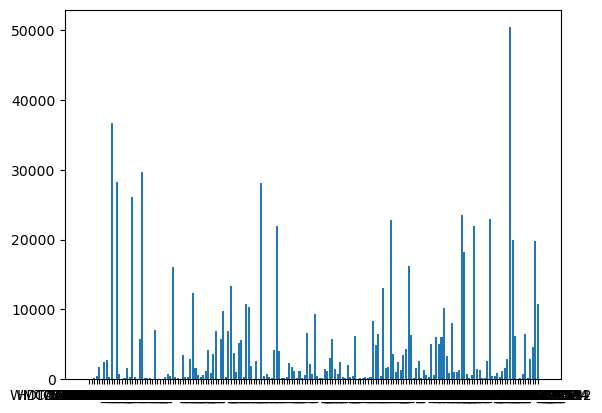

In [96]:
PLM = motif_plus_cond_data.drop("_condition", axis=1).columns.to_list()
values = motif_plus_cond_data.drop("_condition", axis=1).sum(axis="index")

plt.figure()
plt.bar(PLM,values)
plt.show()

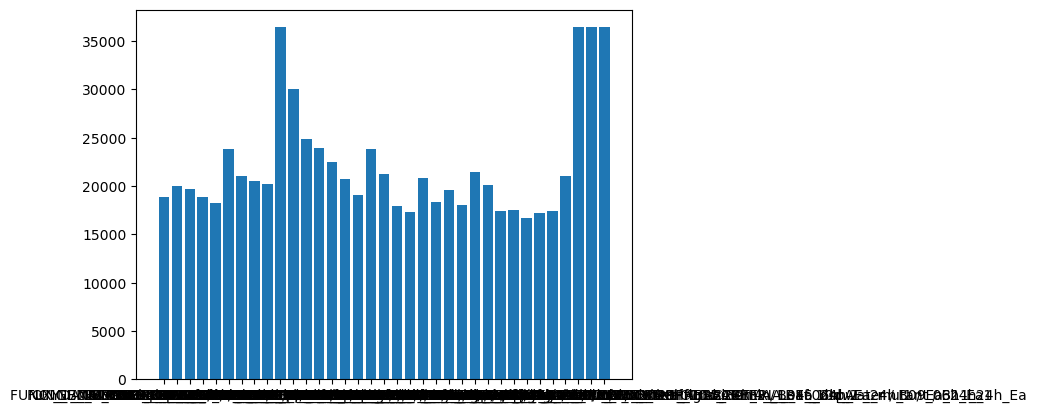

In [73]:
values = motif_plus_cond_data.drop("_condition", axis=1).sum(axis="columns")
cond = motif_plus_cond_data["_condition"].to_list()

plt.figure()
plt.bar(cond,values)
plt.show()